Electricity data. 7 features. 2 classes.
100 batches of 261 instances



METHOD: Static lp as classifier
Execution time:  0.9429531100000048
Average MCC:  0.38946404882711927
Average error: 28.59020000000001
Average macro-F1: 0.6180992248948561
Average micro-F1: 0.7126
Average Accuracy:  71.40979999999999
Standard Deviation:  10.980203730350365
Variance:  120.56487396000006


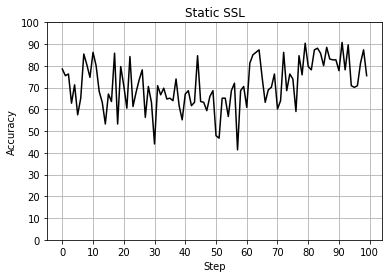

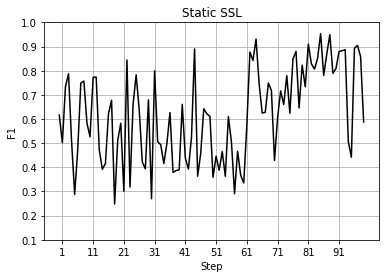

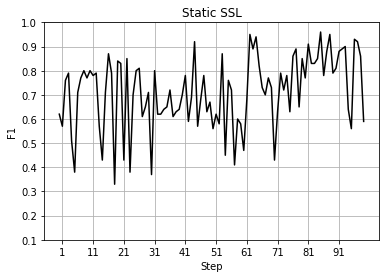




METHOD: Sliding lp as classifier
Execution time:  0.5915621760000036
Average MCC:  0.02035029234043235
Average error: 40.7781
Average macro-F1: 0.37711227872058173
Average micro-F1: 0.5911
Average Accuracy:  59.2219
Standard Deviation:  10.27607996222295
Variance:  105.59781939000001


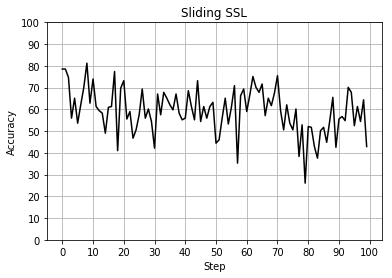

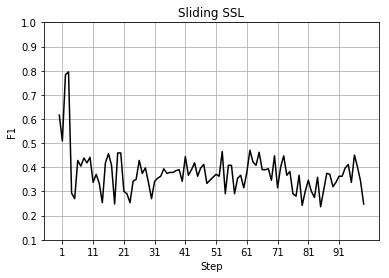

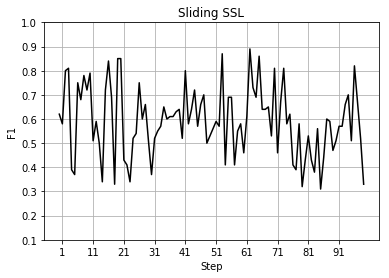




METHOD: Incremental lp as classifier
Execution time:  21.512727522
Average MCC:  0.3730235150756376
Average error: 28.842900000000014
Average macro-F1: 0.5970643170388014
Average micro-F1: 0.7103000000000002
Average Accuracy:  71.15709999999999
Standard Deviation:  12.193049191650134
Variance:  148.67044858999998


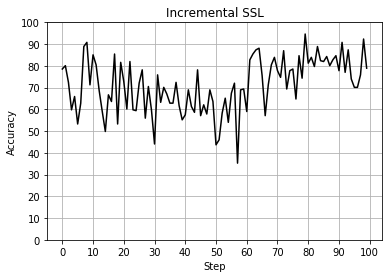

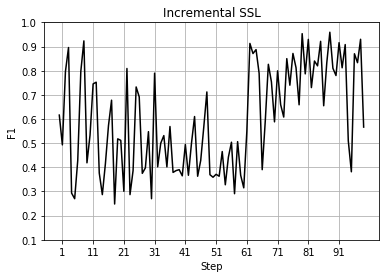

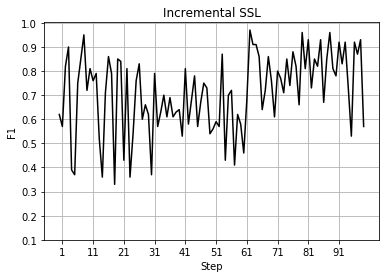




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.9015710589999983
Average MCC:  0.022218718283582132
Average error: 40.7704
Average macro-F1: 0.3829714773364536
Average micro-F1: 0.5889
Average Accuracy:  59.2296
Standard Deviation:  10.146149902302843
Variance:  102.94435784


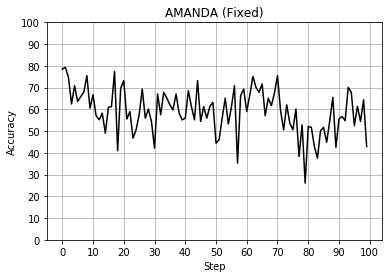

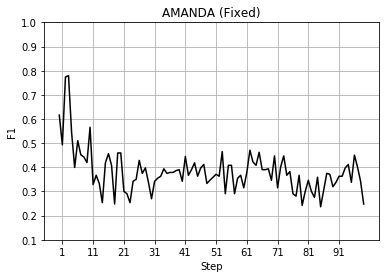

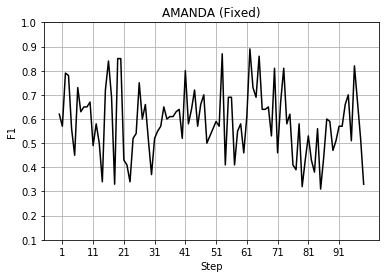




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.50 | Std keeping percentage=0.00
Execution time:  2.1301739770000125
Average MCC:  0.02360315905805531
Average error: 40.80870000000001
Average macro-F1: 0.3797261266591538
Average micro-F1: 0.5913
Average Accuracy:  59.19129999999999
Standard Deviation:  10.054442068558552
Variance:  101.09180530999998


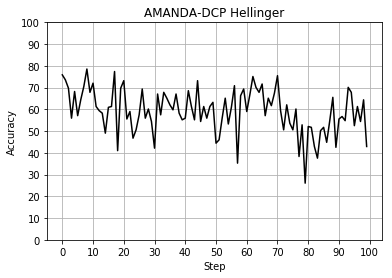

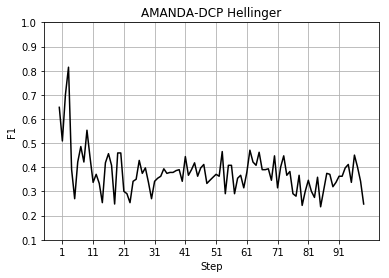

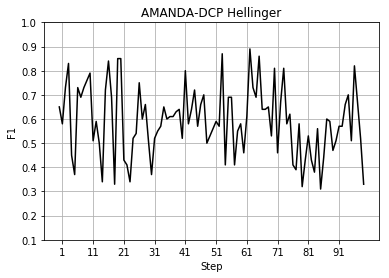




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.27 | Std keeping percentage=0.06
Execution time:  0.9221965429999983
Average MCC:  0.030319984236800962
Average error: 40.7817
Average macro-F1: 0.3834624991221316
Average micro-F1: 0.5910000000000001
Average Accuracy:  59.2183
Standard Deviation:  10.322094560214028
Variance:  106.54563611000003


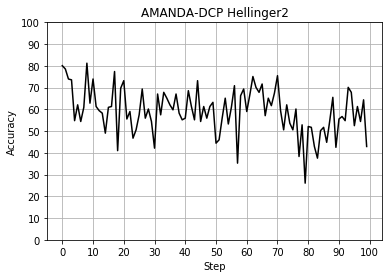

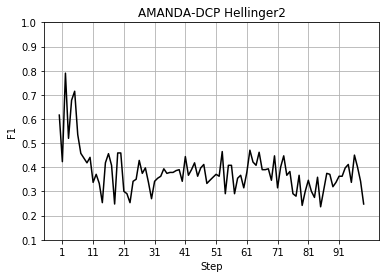

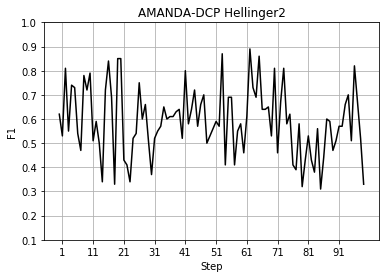




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.23 | Std keeping percentage=0.10
Execution time:  0.8555547899999993
Average MCC:  0.02795874780589412
Average error: 40.9542
Average macro-F1: 0.38467202764484293
Average micro-F1: 0.5923
Average Accuracy:  59.0458
Standard Deviation:  10.30244166981789
Variance:  106.14030436000003


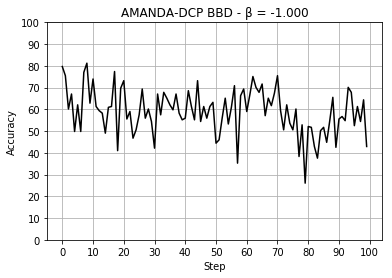

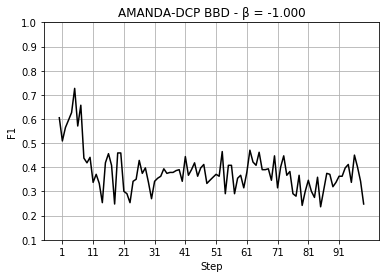

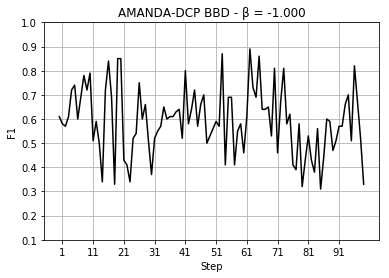




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.17 | Std keeping percentage=0.08
Execution time:  0.8085890589999991
Average MCC:  0.02510327103674709
Average error: 40.9044
Average macro-F1: 0.379431937065711
Average micro-F1: 0.5896
Average Accuracy:  59.0956
Standard Deviation:  10.330535060682967
Variance:  106.71995464000004


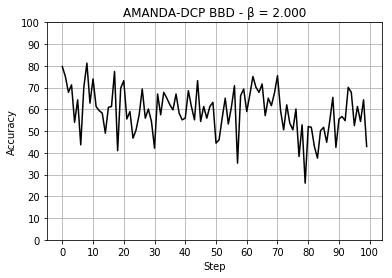

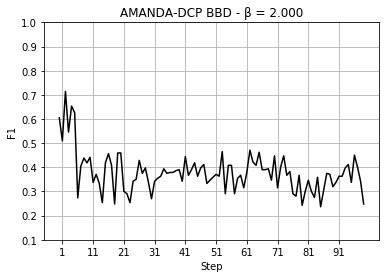

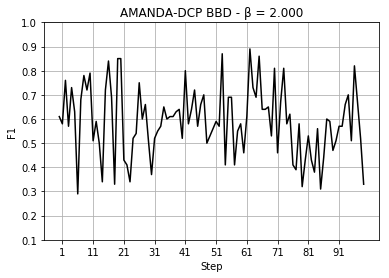




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 3.000 | Mean keeping percentage=0.17 | Std keeping percentage=0.08
Execution time:  0.8390602640000111
Average MCC:  0.06590835800713962
Average error: 40.68620000000001
Average macro-F1: 0.4070763591718498
Average micro-F1: 0.5991
Average Accuracy:  59.31379999999999
Standard Deviation:  10.247867756757987
Variance:  105.01879355999998


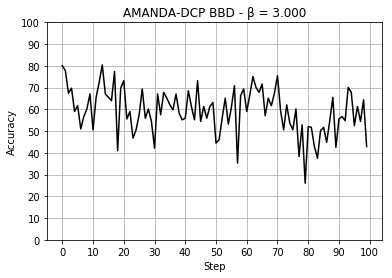

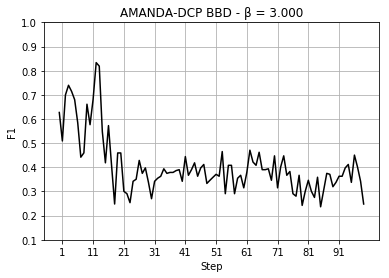

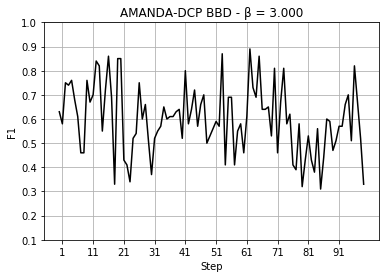




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.18 | Std keeping percentage=0.09
Execution time:  1.0644102340000074
Average MCC:  -0.00934514403344556
Average error: 55.95399999999999
Average macro-F1: 0.31812443068026
Average micro-F1: 0.43320000000000003
Average Accuracy:  44.04600000000001
Standard Deviation:  11.966144826133437
Variance:  143.18862200000004


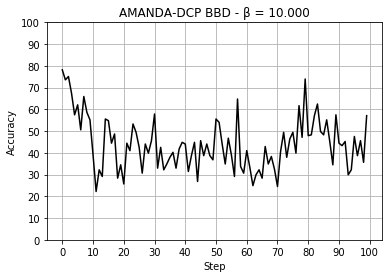

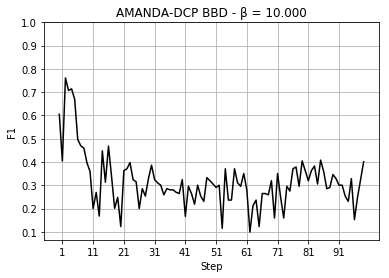

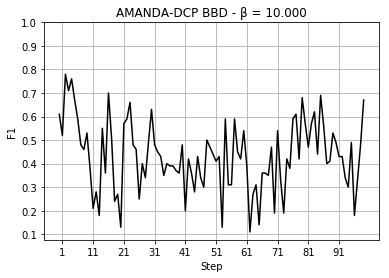

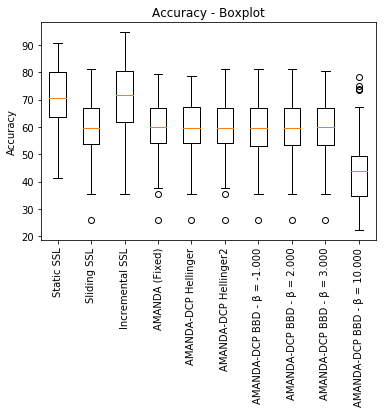

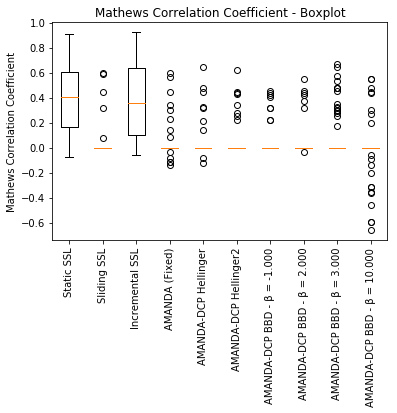

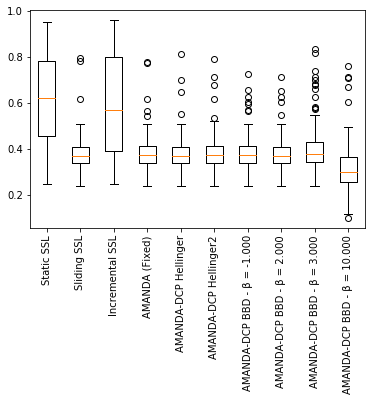

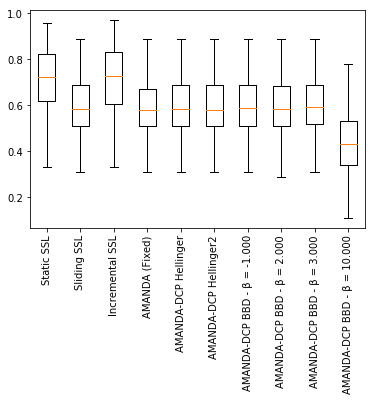

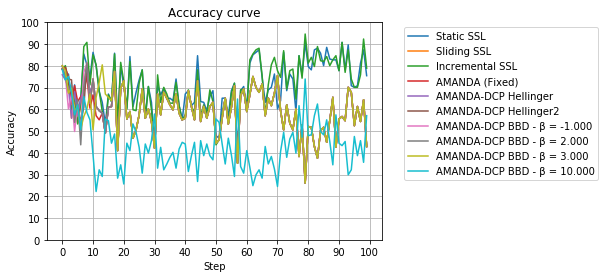

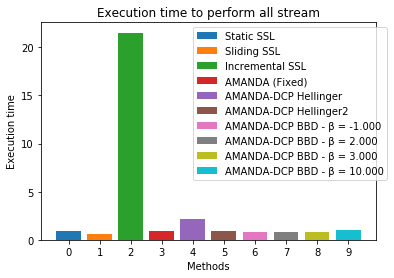

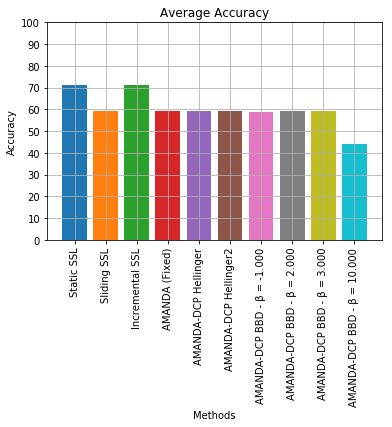

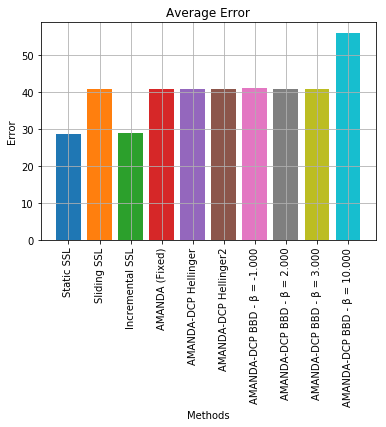

Pos 5 - Error reduction (Sliding SSL):-17.067545350918213
Pos 2 - Error reduction (Incremental SSL):-0.3538729978238343
Pos 4 - Error reduction (AMANDA (Fixed)):-17.056762517189508
Pos 7 - Error reduction (AMANDA-DCP Hellinger):-17.110396612229696
Pos 6 - Error reduction (AMANDA-DCP Hellinger2):-17.072586675778386
Pos 9 - Error reduction (AMANDA-DCP BBD - β = -1.000):-17.314150158661683
Pos 8 - Error reduction (AMANDA-DCP BBD - β = 2.000):-17.24441183142929
Pos 3 - Error reduction (AMANDA-DCP BBD - β = 3.000):-16.93885153018213
Pos 10 - Error reduction (AMANDA-DCP BBD - β = 10.000):-38.31939033578023


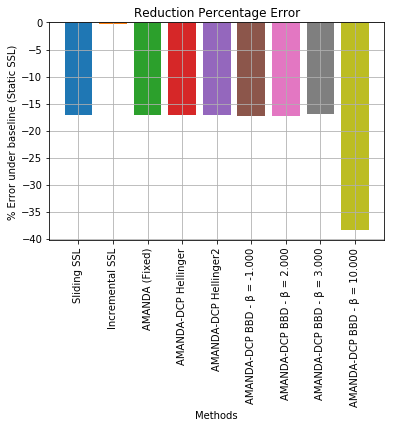

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])
import psutil
import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
'''
from methods import prequential_amanda_fixed
from methods import prequential_amanda_dynamic
from methods import prequential_static_classifier
from methods import prequential_deslizante_LN
from methods import prequential_incremental_LN
from methods import prequential_compose_gmm_version
'''


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = True
    externalResults = []
    plot_animation = False
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadElecData(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))
    
    # Static SSL
    experiments[0] = Experiment(static_classifier, 4, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 4, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 4, clfName=sslClassifier)    
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 4, 0.7, "kde", sslClassifier)
    
    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 3, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1, 2, 3, 10]
    bestK = [12, 6, 7, 5]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
     # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'HDDDM')
    
    # memory usage
    #process = psutil.Process(os.getpid())
    '''
    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    #experiments[4] = Experiment(amanda_dynamic, 12, None, "kde", sslClassifier)
    
    #print("Memory:", process.memory_info().rss)
    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 3)
    
    
    #prequential evaluation
    steps = 10
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.05*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 6, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 6, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 6, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 6, 0.6, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 12, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 6, 0.6)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'elec2', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw[:labeledData], "accuracies":originalAccsLevelIw[:labeledData], "time":timeLevelIw})
    '''
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()